In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl    #pylab a module in matplotlib 
import numpy as np


#magic function; improves the render
%matplotlib inline

In [18]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv


--2022-08-04 15:15:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   288KB/s    in 0.2s    

2022-08-04 15:15:32 (288 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [19]:
df = pd.read_csv("FuelConsumption.csv")

# Generates Discriptive stats; (Central tendency, dispresion, shape of DS (!NA values))
df.describe()  

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [20]:
# filtering DS; selecting useful features  
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


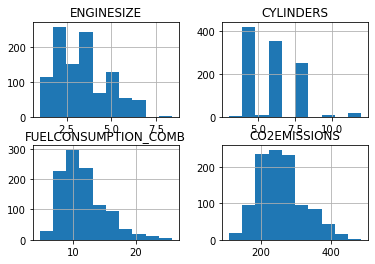

In [21]:
viz = cdf
viz.hist()
plt.show()

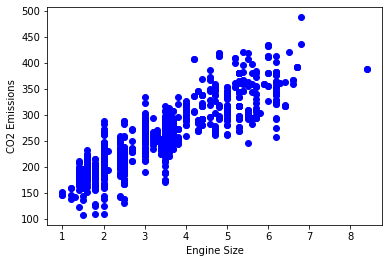

In [22]:
plt.scatter(cdf['ENGINESIZE'],cdf['CO2EMISSIONS'], color = 'blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

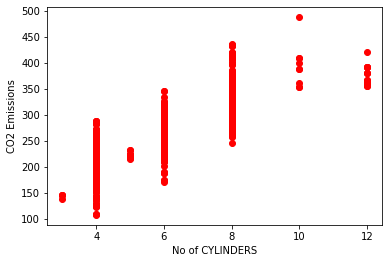

In [23]:
plt.scatter(cdf['CYLINDERS'],cdf['CO2EMISSIONS'], color = 'red')
plt.xlabel('No of CYLINDERS')
plt.ylabel('CO2 Emissions')
plt.show()

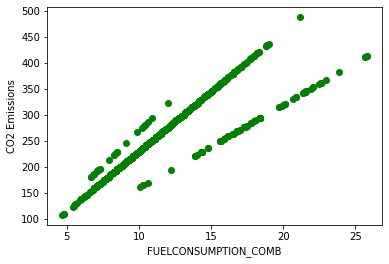

In [24]:
plt.scatter(cdf['FUELCONSUMPTION_COMB'],cdf['CO2EMISSIONS'], color = 'green')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2 Emissions')
plt.show()

In [25]:
# spliting the DS (80:20) 
# nupy's rand() to select random 80% of rows, 
# with condition it being less than 80% of df's len

msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]  # '~' tilde; Not of those 80% rows

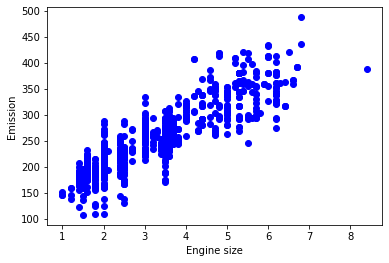

In [26]:
plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [27]:
from sklearn import linear_model

# create an instance 
lin_regr = linear_model.LinearRegression()

# convert the data to an array
X_train = np.asanyarray(train[['ENGINESIZE']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])

# Fit the train data
lin_regr.fit(X_train, y_train)

# print coefficients 
print("Intercept: ", lin_regr.intercept_)
print("Coefficients: ", lin_regr.coef_)

Intercept:  [123.63985068]
Coefficients:  [[39.91303981]]


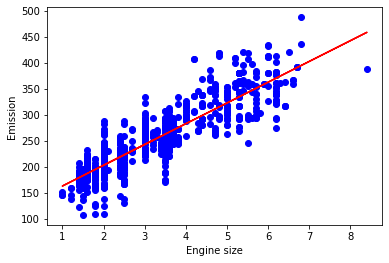

In [34]:
plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'],  color='blue')
y_s = lin_regr.coef_[0][0]*X_train + lin_regr.intercept_[0]
# print(y_s)
# formula: y = M*x + b 
plt.plot(X_train, y_s, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [37]:
lin_regr.score(X_train, y_train)

0.7702845090746501